<a href="https://colab.research.google.com/github/EvM82/Machine-Learning-25/blob/main/exercise8_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!unzip archive.zip

Archive:  archive.zip
  inflating: dataset/Beagle/Beagle_1.jpg  
  inflating: dataset/Beagle/Beagle_10.jpg  
  inflating: dataset/Beagle/Beagle_100.jpg  
  inflating: dataset/Beagle/Beagle_11.jpg  
  inflating: dataset/Beagle/Beagle_12.jpg  
  inflating: dataset/Beagle/Beagle_13.jpg  
  inflating: dataset/Beagle/Beagle_14.jpg  
  inflating: dataset/Beagle/Beagle_15.jpg  
  inflating: dataset/Beagle/Beagle_16.jpg  
  inflating: dataset/Beagle/Beagle_17.jpg  
  inflating: dataset/Beagle/Beagle_18.jpg  
  inflating: dataset/Beagle/Beagle_19.jpg  
  inflating: dataset/Beagle/Beagle_2.jpg  
  inflating: dataset/Beagle/Beagle_20.jpg  
  inflating: dataset/Beagle/Beagle_21.jpg  
  inflating: dataset/Beagle/Beagle_22.jpg  
  inflating: dataset/Beagle/Beagle_23.jpg  
  inflating: dataset/Beagle/Beagle_24.jpg  
  inflating: dataset/Beagle/Beagle_25.jpg  
  inflating: dataset/Beagle/Beagle_26.jpg  
  inflating: dataset/Beagle/Beagle_27.jpg  
  inflating: dataset/Beagle/Beagle_28.jpg  
  inflating

In [5]:
import os
import PIL
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [6]:
!unzip archive.zip

Archive:  archive.zip
replace dataset/Beagle/Beagle_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: dataset/Beagle/Beagle_1.jpg  
  inflating: dataset/Beagle/Beagle_10.jpg  
  inflating: dataset/Beagle/Beagle_100.jpg  
  inflating: dataset/Beagle/Beagle_11.jpg  
  inflating: dataset/Beagle/Beagle_12.jpg  
  inflating: dataset/Beagle/Beagle_13.jpg  
  inflating: dataset/Beagle/Beagle_14.jpg  
  inflating: dataset/Beagle/Beagle_15.jpg  
  inflating: dataset/Beagle/Beagle_16.jpg  
  inflating: dataset/Beagle/Beagle_17.jpg  
  inflating: dataset/Beagle/Beagle_18.jpg  
  inflating: dataset/Beagle/Beagle_19.jpg  
  inflating: dataset/Beagle/Beagle_2.jpg  
  inflating: dataset/Beagle/Beagle_20.jpg  
  inflating: dataset/Beagle/Beagle_21.jpg  
  inflating: dataset/Beagle/Beagle_22.jpg  
  inflating: dataset/Beagle/Beagle_23.jpg  
  inflating: dataset/Beagle/Beagle_24.jpg  
  inflating: dataset/Beagle/Beagle_25.jpg  
  inflating: dataset/Beagle/Beagle_26.jpg  
  inflating: dataset/B

## Ερώτημα 3 - Image Preprocessing

In [14]:
class_names = sorted(os.listdir('dataset'))
class_ids = {label: i for i, label in enumerate(class_names)}
class_ids

{'Beagle': 0,
 'Boxer': 1,
 'Bulldog': 2,
 'Dachshund': 3,
 'German_Shepherd': 4,
 'Golden_Retriever': 5,
 'Labrador_Retriever': 6,
 'Poodle': 7,
 'Rottweiler': 8,
 'Yorkshire_Terrier': 9}

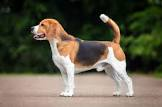

In [15]:
image_filepath = 'dataset/Beagle/Beagle_1.jpg'
image = PIL.Image.open(image_filepath)
image

In [16]:
image_size = (64, 64)

inputs = []
targets = []
for label in class_names:
    for filename in os.listdir(f'dataset/{label}'):
        filepath = f'dataset/{label}/{filename}'
        img = PIL.Image.open(filepath).convert('RGB').resize(image_size)
        inputs.append(img)


        targets.append(class_ids[label])
inputs = np.float32(inputs)
targets = np.int32(targets)

inputs.shape, targets.shape

((967, 64, 64, 3), (967,))

<BarContainer object of 10 artists>

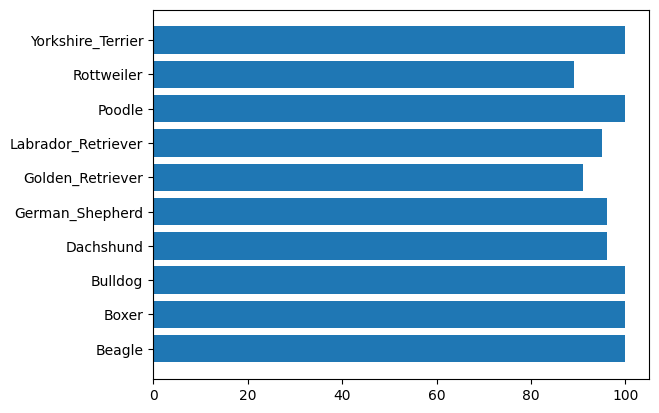

In [17]:
target_counts = np.unique(targets, return_counts=True)
plt.barh(class_names, target_counts[1])

Από το bar plot παρατηρούμε οτι προκειται για ισορροπημένο dataset.

## Ερώτημα 4-Split into train-test

In [18]:
seed = 0

tf.random.set_seed(seed=seed)
np.random.seed(seed=seed)
random.seed(seed)

In [19]:
test_size = 0.3
stratify = [targets.shape]

x_train, x_test, y_train, y_test = train_test_split(
    inputs,
    targets,
    test_size=0.3,
    stratify=targets,
    random_state=seed
)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((676, 64, 64, 3), (676,), (291, 64, 64, 3), (291,))

Κανονικοποίηση (διαιρώντας με 255) και one-hot encoding για τα targets. Κάθε ακέραια τιμή κλάσης θα μετατραπεί στο δυαδικό διάνυσμα, όπου θα είναι 1 σε ενα ψηφίο και 0 στα άλλα. Αυτό γίνεται ώστε να μην υποθέσει το νευρωνικό δίκτυο ή ο αλγόριθμος πως υπάρχει ιεραρχία από τους ακέραιους αριθμούς ή αριθμητικής σχέσης μεταξύ των κλάσεων(0,1,2, κτλ).




In [20]:
x_train /= 255.0
x_test /= 255.0
y_train = np.eye(len(class_names))[y_train]
y_test = np.eye(len(class_names))[y_test]

y_train.shape, y_test.shape

((676, 10), (291, 10))

## Ερώτημα 4- MLP

In [17]:
input_size = x_train.shape[1:]
output_size = len(class_names)

mlp = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=output_size, activation='softmax', use_bias=True)
], name='MLP')
mlp.summary()

Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,572,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,590,794 (6.07 MB)

 Trainable params: 1,590,794 (6.07 MB)

 Non-trainable params: 0 (0.00 B)

Το επίπεδο εισόδου δέχεται εικόνες διαστάσεων 64×64×3 (σχήμα εισόδου του δικτύου: (64,64,3)) .
<br>
</br>
Το επίπεδο Flatten μετατρέπει την τρισδιάστατη είσοδο σε μονοδιάστατο διάνυσμα χαρακτηριστικών πριν η είσοδος δωθεί στο πρώτο επίπεδο. Συγκεκριμένα, κάθε εικόνα μετασχηματίζεται σε διάνυσμα 64×64×3=12288 χαρακτηριστικών.
<br>
</br>
Το πρώτο Dense επίπεδο περιλαμβάνει 128 νευρώνες και χρησιμοποιεί τη συνάρτηση ενεργοποίησης ReLU (Rectified Linear Unit). Οι συνλόλικες παράμετροι που χρησιμοποιεί είναι 1572992 (βάρη και bias), όπως φαίνεται από το summary.
<br>
</br>
Το δεύτερο Dense επίπεδο αποτελείται επίσης από 128 νευρώνες με συνάρτηση ενεργοποίησης ReLU και έχει 16512 παραμέτρους.
<br>
</br>
Το επίπεδο εξόδου αποτελείται από 10 νευρώνες (όσες οι κλάσεις του προβλήματος) και ρησιμοποιεί τη συνάρτηση ενεργοποίησης softmax, η οποία μετατρέπει τις εξόδους του δικτύου σε πιθανότητες που αθροίζουν στη μονάδα.




## Ερώτημα 5 -Εκπαίδευση νευρωνικού με τις παραμέτρους της άσκησης.

In [19]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
mlp.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
batch_size = 32
epochs = 30

history = mlp.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.1114 - loss: 3.4492 - val_accuracy: 0.2405 - val_loss: 2.3407
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3290 - loss: 2.1139 - val_accuracy: 0.3058 - val_loss: 1.8775
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4222 - loss: 1.7414 - val_accuracy: 0.3608 - val_loss: 1.7471
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5496 - loss: 1.5159 - val_accuracy: 0.5223 - val_loss: 1.4746
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6102 - loss: 1.2736 - val_accuracy: 0.4089 - val_loss: 1.5301
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5927 - loss: 1.2016 - val_accuracy: 0.3780 - val_loss: 1.7180
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6538 - loss: 1.1371 - val_accuracy: 0.5601 - val_loss: 1.2756
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7194 - loss: 0.9733 - val_accuracy: 0.5361 - v

## Ερώτημα 6 - loss and accuracy history

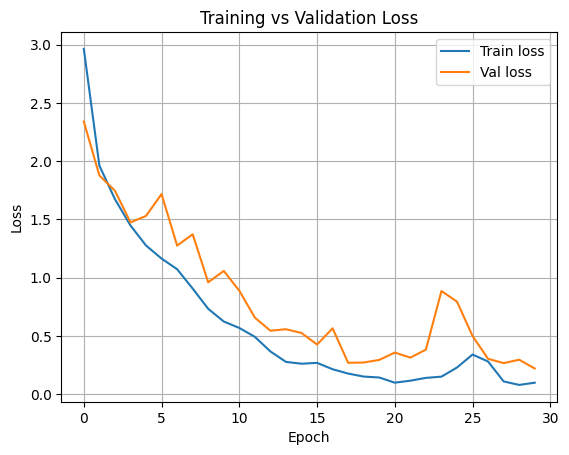

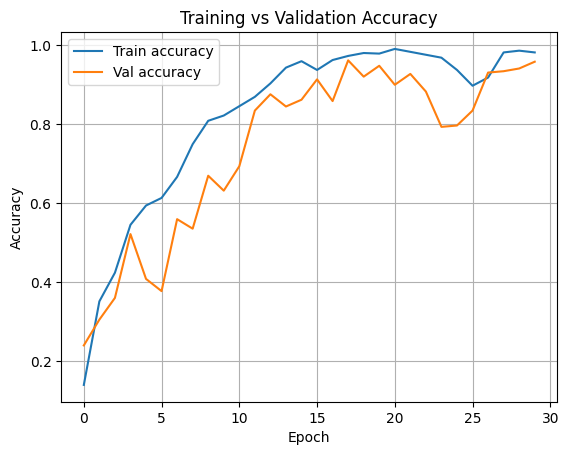

In [21]:
plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Παρατηρούμε ότι τόσο το train όσο και το validation loss φθίνουν και έχουν παρόμοια πορεία, με το validation loss να έχει περισσότερα peaks και λίγο υψηλότερες τιμές. Γενικά πάντως, το loss φαίνεται να μειώνεται και για άγνωστα δεδομένα, υποδηλώνοντας καλή γενίκευση.
<br>
</br>
Ομοίως τα train και validation accuracy ακολουθούν παρόμοια ανοδική κίνηση, με του validation να έχει και μερικές έντονες πτώσεις (drops). Αυτό ήταν   αναμενόμενο καθώς υπολογίζεται σε άγνωστα δεδομένα. Οι τιμές τους πάντως δεν φαίνεται να απέχουν σημαντικά μεταξύ train, validation, δεν παρουσιάζεται  φαινόμενο υπερπροσαρμογής και φαίνεται επίσης ότι υπάρχει καλή γενικευση.

## Ερώτημα 7 -CNN

## 7.4 Ορισμός CNN

In [22]:
cnn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, activation='relu', use_bias=True),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu', use_bias=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=output_size, activation='softmax', use_bias=True)
], name='CNN')
cnn.summary()

Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 31, 31, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 26912)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     3,444,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,456,298 (13.18 MB)

 Trainable params: 3,456,298 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

Το επίπεδο εισόδου δέχεται εικόνες διαστάσεων 64×64×3 (σχήμα εισόδου του δικτύου: (64, 64, 3)).
<br></br>
Το πρώτο συνελικτικό επίπεδο (Conv2D) χρησιμοποιεί 32 φίλτρα μεγέθους 3×3, με βήμα (stride=2) και συνάρτηση ενεργοποίησης ReLU (Rectified Linear Unit). Το επίπεδο αυτό εξάγει χαρακτηριστικούς χάρτες διαστάσεων 31×31×32 και διαθέτει 896 παραμέτρους (βάρη και bias).
<br></br>
Ακολουθεί ένα επίπεδο Dropout με ρυθμό 0.2 που χρησιμοποιείται για τη μείωση της υπερπροσαρμογής, απενεργοποιώντας κατά την εκπαίδευση τυχαία ποσοστό νευρώνων.
<br></br>
Το δεύτερο συνελικτικό επίπεδο χρησιμοποιεί επίσης 32 φίλτρα μεγέθους 3×3, με βήμα ίσο με 1 και συνάρτηση ενεργοποίησης ReLU. Η έξοδος του επιπέδου έχει διαστάσεις 29×29×32 και το επίπεδο έχει 9248 παραμέτρους.
<br></br>
Το επίπεδο Flatten μετατρέπει την τρισδιάστατη έξοδο των συνελικτικών επιπέδων σε μονοδιάστατο διάνυσμα χαρακτηριστικώνκαι έτσι θα προκύψει διάνυσμα μήκους 29×29×32 = 26912 χαρακτηριστικών.
<br></br>
Το πρώτο πλήρως συνδεδεμένο (Dense) επίπεδο περιλαμβάνει 128 νευρώνες και χρησιμοποιεί τη συνάρτηση ενεργοποίησης ReLU. Διαθέτει συνολικά 3444864  παραμέτρους.
<br></br>
Το επίπεδο εξόδου αποτελείται από 10 νευρώνες, όσες και οι κλάσεις του προβλήματος, και χρησιμοποιεί τη συνάρτηση ενεργοποίησης softmax.

## 7.5 Εκπαίδευση νευρωνικού

In [23]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

history = cnn.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 184ms/step - accuracy: 0.1252 - loss: 2.4610 - val_accuracy: 0.4055 - val_loss: 2.1832
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.4168 - loss: 2.0070 - val_accuracy: 0.5120 - val_loss: 1.6084
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.6222 - loss: 1.2607 - val_accuracy: 0.6392 - val_loss: 1.0003
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.8544 - loss: 0.5910 - val_accuracy: 0.8763 - val_loss: 0.3914
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.9515 - loss: 0.2708 - val_accuracy: 0.9759 - val_loss: 0.1758
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.9941 - loss: 0.0682 - val_accuracy: 0.9759 - val_loss: 0.1144
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.9949 - loss: 0.0286 - val_accuracy: 0.9759 - val_loss: 0.1156
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - accuracy: 1.0000 - loss: 0.0087 - val_accuracy: 0.

## 7.6 loss and accuracy history

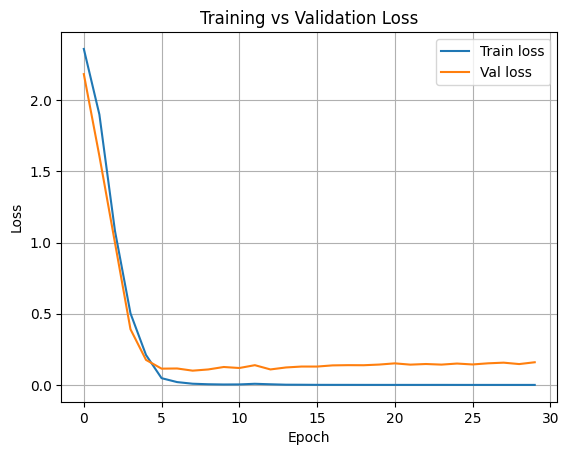

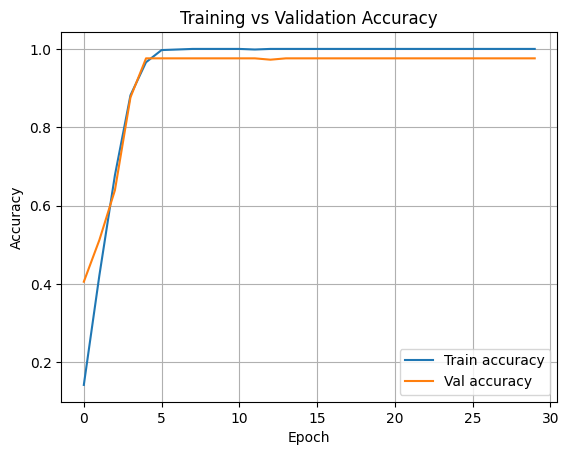

In [24]:
plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Τόσο στα loss όσο και στα accuracy plots παρατηρείται ότι τα train και validation κινούνται πολύ κοντά το ένα με το άλλο.
Σ σχέση μάλιστα με το προηγούμενο MLP, υπάρχει αισθητή βελτίωση και μικρότερη διαφορά στα train και validation, ενώ γενικά υπάρχουν λιγοτερες διακυμάνσεις και φαλινεται στο loss και στο accuracy να σταεροποιούνται ξεκάθαρα σε συγκεκριμένες τιμές, σε αντίθεση με το προηγούμενο μοντέλο όπου δεν ήταν τοσο ξεκάθαρη σύγκλιση.
Οι παραπάνω παρατηρήσεις, υποδηλώνουν ότι το CNN γενικεύει καλύτερα στα δεδομένα ελέγχου και παρουσιάζει πιο αξιόπιστη συμπεριφορά κατά την εκπαίδευση από ότι το MLP.

## Ερώτημα 8

BatchNormalization μετά από Conv2D και Dense.

Hyperparameter tuning

Μέσα στο for loops εκπαιδεύεται το μοντέλο και εξετάζονται οι συνδυασμοί για την παράμετρο learning rate, epochs και batch sizes. Επειδή κάθε φορά πρέπει να χρησιμοποιείται το μοντέλο εκ νέου, χωρίς δηλαδή να έχει κρατησει πληροφορία από την εκπαίδευση των προηγούμενων, ορίζεται μέσα στο loop και το CNN.

In [28]:
lr_list = [1e-3, 5e-4, 1e-4]
batch_size_list = [32, 64]
epoch_list = [20, 30, 50]

best_val_acc = 0
best_params = None

for lr in lr_list:
    for batch_size in batch_size_list:
        for epochs in epoch_list:

            print(f"\nLR={lr}, batch_size={batch_size}, epochs={epochs}")

            cnn = tf.keras.Sequential([
                tf.keras.layers.Input(shape=input_size),
                tf.keras.layers.Conv2D(32, 3, strides=2, activation='relu'),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dropout(0.2),
                tf.keras.layers.Conv2D(32, 3, activation='relu'),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(128, activation='relu'),
                tf.keras.layers.Dense(output_size, activation='softmax')
            ])

            optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

            cnn.compile(
                optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy']
            )

            history = cnn.fit(
                x_train, y_train,
                epochs=epochs,
                batch_size=batch_size,
                validation_data=(x_test, y_test),
                verbose=0
            )

            val_acc = max(history.history['val_accuracy'])
            print(f"Best val_accuracy = {val_acc:.4f}")

            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_params = (lr, batch_size, epochs)

print("\nBEST PARAMETERS:")
print(f"learning_rate={best_params[0]}, batch_size={best_params[1]}, epochs={best_params[2]}")
print(f"Best val_accuracy={best_val_acc:.4f}")



LR=0.001, batch_size=32, epochs=20
Best val_accuracy = 0.4192

LR=0.001, batch_size=32, epochs=30
Best val_accuracy = 0.9931

LR=0.001, batch_size=32, epochs=50
Best val_accuracy = 0.9897

LR=0.001, batch_size=64, epochs=20
Best val_accuracy = 0.1993

LR=0.001, batch_size=64, epochs=30
Best val_accuracy = 0.7045

LR=0.001, batch_size=64, epochs=50
Best val_accuracy = 0.8454

LR=0.0005, batch_size=32, epochs=20
Best val_accuracy = 0.8935

LR=0.0005, batch_size=32, epochs=30
Best val_accuracy = 0.9931

LR=0.0005, batch_size=32, epochs=50
Best val_accuracy = 0.9931

LR=0.0005, batch_size=64, epochs=20
Best val_accuracy = 0.2990

LR=0.0005, batch_size=64, epochs=30
Best val_accuracy = 0.5842

LR=0.0005, batch_size=64, epochs=50
Best val_accuracy = 0.9828

LR=0.0001, batch_size=32, epochs=20
Best val_accuracy = 0.9897

LR=0.0001, batch_size=32, epochs=30
Best val_accuracy = 0.9897

LR=0.0001, batch_size=32, epochs=50
Best val_accuracy = 0.9931

LR=0.0001, batch_size=64, epochs=20
Best val_

Επομένως δοκιμάστηκε για την βελτίωση του μοντέλου η προσθήκη BatchNormalization και πραγματοποιήθηκε fine tuning για υπερπαραμέτρους.

Παρακάτω ορίζεται το μοντέλο, το οποίο θα εκπαιδευτεί για τις παραμέτρους που δίνουν το υψηλότερο accuracy.

In [ ]:
input_size = x_train.shape[1:]
output_size = len(class_names)
cnn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, activation='relu', use_bias=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu', use_bias=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=output_size, activation='softmax', use_bias=True)
], name='CNN')
cnn.summary()

In [29]:
learning_rate=0.001
batch_size=32
epochs=30

optim = tf.keras.optimizers.Adam(learning_rate=learning_rate)
cnn.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

history = cnn.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 178ms/step - accuracy: 0.8590 - loss: 1.1538 - val_accuracy: 0.1821 - val_loss: 16.2734
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9601 - loss: 0.1551 - val_accuracy: 0.4021 - val_loss: 5.5226
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9898 - loss: 0.0357 - val_accuracy: 0.6976 - val_loss: 1.8278
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9982 - loss: 0.0149 - val_accuracy: 0.9691 - val_loss: 0.1720
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9970 - loss: 0.0063 - val_accuracy: 0.9175 - val_loss: 0.3561
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9949 - loss: 0.0138 - val_accuracy: 0.9416 - val_loss: 0.3039
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9977 - loss: 0.0054 - val_accuracy: 0.9931 - val_loss: 0.0866
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 2.7200e-04 - val_accuracy: 0.9931 - va

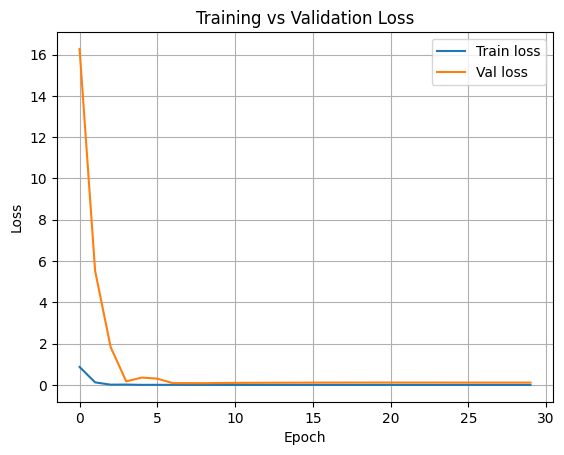

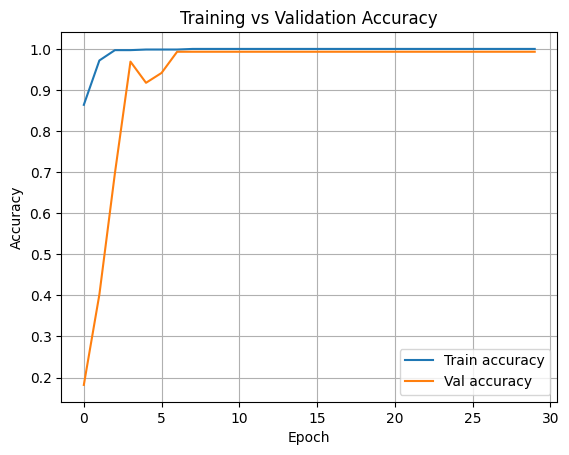

In [30]:
plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Παρατηρείται πολύ γρήγορη σύγκλιση του μοντέλου, με το training και validation loss να μειώνονται απότομα στα πρώτα epochs και να σταθεροποιούνται σε πολύ χαμηλές τιμές.
Αντίστοιχα, το accuracy φτάνει σε πολύ υψηλα επίπεδα τόσο για τα δεδομένα εκπαίδευσης όσο και για τα δεδομένα validation, χωρίς σημαντική απόκλιση μεταξύ τους. Το γεγονός αυτό υποδηλώνει πολύ καλή προσαρμογή του μοντέλου στα δεδομένα και άρα υπήρχε βελτώση από τις τεχνκές που χρησιμοποιήθηκαν.